# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot this time series data. 

Text(0.5, 1.0, 'Time Series Plot for Winning Times')

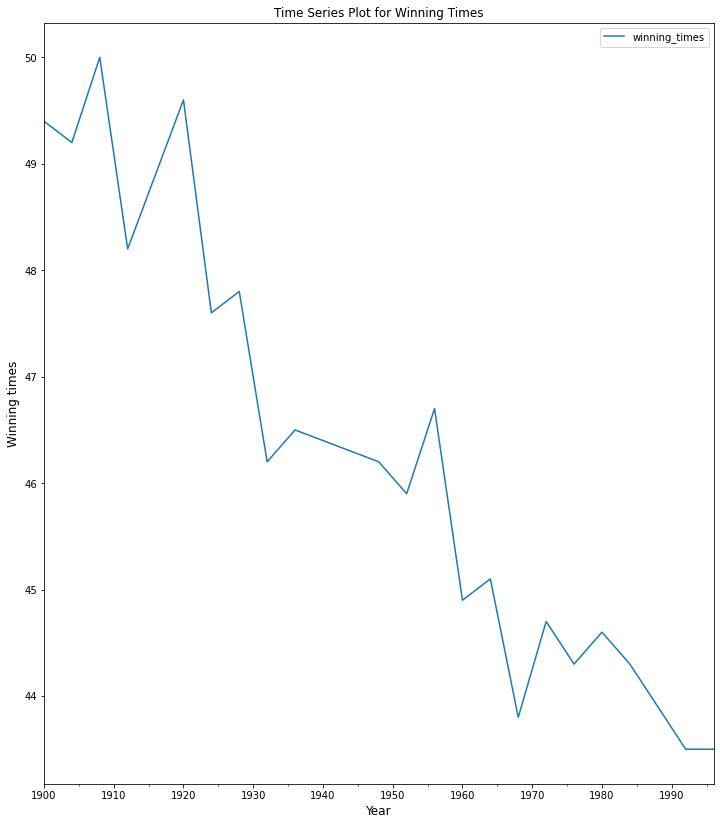

In [3]:
# Plot the time series
data.plot(figsize=(12, 14));
plt.xlabel('Year', fontsize=12)
plt.ylabel('Winning times', fontsize=12);
plt.title("Time Series Plot for Winning Times")

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff(periods=1).dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

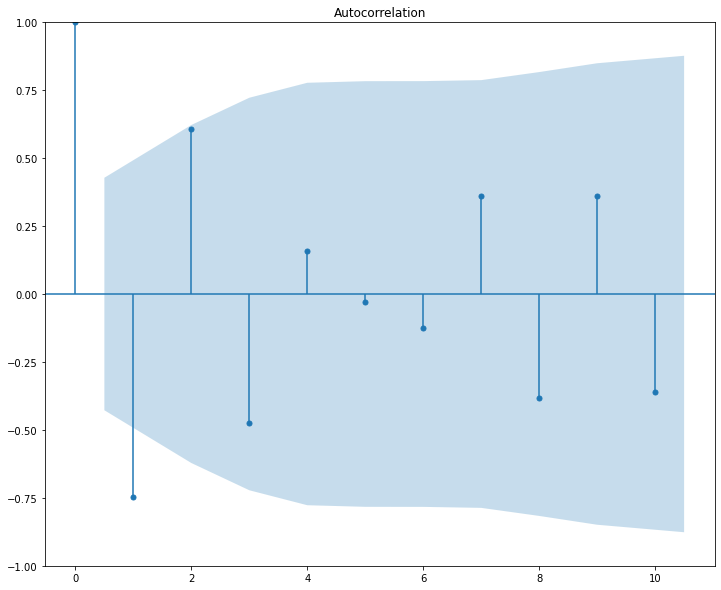

In [5]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(12,10))
plot_acf(data_diff,ax=ax, lags=10);

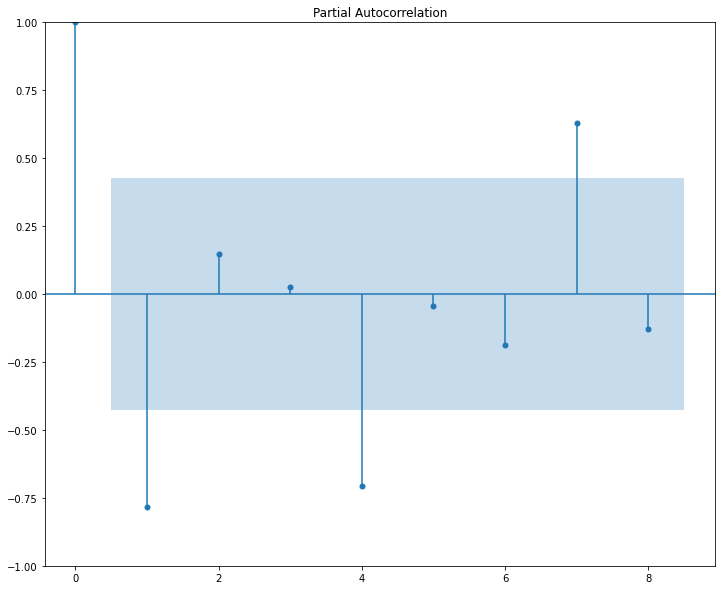

In [6]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(12,10))
plot_pacf(data_diff,ax=ax, lags=8);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

Used ARIMA model since ARMA model has refused to run from the statsmodels package

In [12]:
# from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

# from statsmodels.tsa.arima.model import ARIMA
# Instantiating an ARMA() model 
mod_arma = ARIMA(data_diff, order=(1, 0, 0))


res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Fri, 26 Aug 2022   AIC                             46.107
Time:                        16:15:52   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.0

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiating an ARMA(1) model 
mod_arma = ARIMA(data_diff, order=(1, 0, 1))


res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.958
Date:                Fri, 26 Aug 2022   AIC                             47.916
Time:                        16:16:25   BIC                             52.094
Sample:                    12-31-1904   HQIC                            48.822
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2850      0.087     -3.266      0.001      -0.456      -0.114
ar.L1         -0.7707      0.177     -4.349      0.000      -1.118      -0.423
ma.L1          0.1172      0.285      0.412      0.6

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiating an ARIMA model 
mod_arma = ARIMA(data_diff, order=(1, 1, 1))


res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -21.643
Date:                Fri, 26 Aug 2022   AIC                             49.287
Time:                        16:17:00   BIC                             52.274
Sample:                    12-31-1904   HQIC                            49.870
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7061      0.154     -4.587      0.000      -1.008      -0.404
ma.L1         -0.9991     46.200     -0.022      0.983     -91.550      89.552
sigma2         0.4022     18.534      0.022      0.9

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here
The best model I picked was the AR (1, 0) model due to the low p-values.

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 